<a href="https://colab.research.google.com/github/AttoMs/Alura_PythonData/blob/main/AulaPython_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1 - Importação e Análise com Pandas

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [ ]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [ ]:
df.describe()
#só busca valor float e int

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
df.shape
#temos a dimensão do arquivo, (X,Y), onde X  = linhas e Y = colunas

(133349, 11)

In [ ]:
linhas, colunas = df.shape[0], df.shape[1]
print("linhas:", linhas)
print("colunas:", colunas)

linhas: 133349
colunas: 11


In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
renomear_colunas = {
    "work_year": "ano_trabalho",
    "experience_level": "nivel_experiencia",
    "employment_type": "contrato",
    "job_title": "cargo",
    "salary": "salario",
    "salary_currency": "moeda",
    "salary_in_usd": "moeda_usd",
    "employee_residence": "residencia_empregado",
    "remote_ratio": "remoto",
    "company_location": "localizacao_empresa",
    "company_size": "tamanho_empresa"
}

df.rename(columns = renomear_colunas, inplace=True)
df.columns

Index(['ano_trabalho', 'nivel_experiencia', 'contrato', 'cargo', 'salario',
       'moeda', 'moeda_usd', 'residencia_empregado', 'remoto',
       'localizacao_empresa', 'tamanho_empresa'],
      dtype='object')

In [ ]:
df["nivel_experiencia"].value_counts()
#SE = senior / MI = intermediário(pleno) / EN = entry (iniciante) / EX = executivo

,count
nivel_experiencia,
SE,77241
MI,40465
EN,12443
EX,3200


In [ ]:
df["contrato"].value_counts()
#FT = fulltime / CT = contrato temporário / PT = part-time(meio período) / FL = freelancer

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [ ]:
df["remoto"].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [ ]:
df["tamanho_empresa"].value_counts()
#M= médio / L =large / S = small

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [ ]:
traducao_experiencia = {
    "SE": "Senior",
    "MI": "Pleno",
    "EN": "Iniciante",
    "EX": "Executivo"
}

df["nivel_experiencia"] = df["nivel_experiencia"].replace(traducao_experiencia)
df["nivel_experiencia"].value_counts()

,count
nivel_experiencia,
Senior,77241
Pleno,40465
Iniciante,12443
Executivo,3200


In [ ]:
traducao_contrato = {
    "FT": "Full Time",
    "CT": "Contrato Temporário",
    "PT": "Part Time",
    "FL": "Freelancer"
}

df["contrato"] = df["contrato"].replace(traducao_contrato)
df["contrato"].value_counts()

,count
contrato,
Full Time,132563
Contrato Temporário,394
Part Time,376
Freelancer,16


In [ ]:
traducao_remoto = {
    0: "Presencial",
    50: "Híbrido",
    100: "Remoto"
}

df["remoto"] = df["remoto"].replace(traducao_remoto)
df["remoto"].value_counts()

,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [ ]:
traducao_tamanho = {
    "M": "Médio",
    "L": "Grande",
    "S": "Pequeno"
}

df["tamanho_empresa"] = df["tamanho_empresa"].replace(traducao_tamanho)
df["tamanho_empresa"].value_counts()

,count
tamanho_empresa,
Médio,129561
Grande,3574
Pequeno,214


In [ ]:
df.head(20)

,ano_trabalho,nivel_experiencia,contrato,cargo,salario,moeda,moeda_usd,residencia_empregado,remoto,localizacao_empresa,tamanho_empresa
0,2025.0,Senior,Full Time,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Full Time,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Full Time,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Full Time,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Iniciante,Full Time,Data Engineer,90000,USD,90000,US,Presencial,US,Médio
5,2025.0,Iniciante,Full Time,Data Engineer,80000,USD,80000,US,Presencial,US,Médio
6,2025.0,Senior,Full Time,Data Scientist,185000,USD,185000,US,Presencial,US,Médio
7,2025.0,Senior,Full Time,Data Scientist,148000,USD,148000,US,Presencial,US,Médio
8,2025.0,Pleno,Full Time,Data Scientist,135000,USD,135000,CA,Presencial,CA,Médio
9,2025.0,Pleno,Full Time,Data Scientist,108000,USD,108000,CA,Presencial,CA,Médio


In [ ]:
df.describe(include="object")

,nivel_experiencia,contrato,cargo,moeda,residencia_empregado,remoto,localizacao_empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Full Time,Data Scientist,USD,US,Presencial,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


# Aula 2 - Preparação e limpeza de Dados

In [ ]:
df.head()

,ano_trabalho,nivel_experiencia,contrato,cargo,salario,moeda,moeda_usd,residencia_empregado,remoto,localizacao_empresa,tamanho_empresa
0,2025.0,Senior,Full Time,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Full Time,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Full Time,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Full Time,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Iniciante,Full Time,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [ ]:
df.isnull().sum()

,0
ano_trabalho,10
nivel_experiencia,0
contrato,0
cargo,0
salario,0
moeda,0
moeda_usd,0
residencia_empregado,0
remoto,0
localizacao_empresa,0


In [ ]:
df['ano_trabalho'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [ ]:
df[df.isnull().any(axis=1)]

,ano_trabalho,nivel_experiencia,contrato,cargo,salario,moeda,moeda_usd,residencia_empregado,remoto,localizacao_empresa,tamanho_empresa
5588,NaN,Senior,Full Time,Product Manager,184500,USD,184500,US,Presencial,US,Médio
59692,NaN,Pleno,Full Time,Engineer,110000,USD,110000,DE,Presencial,DE,Médio
59710,NaN,Iniciante,Full Time,Data Scientist,208800,USD,208800,US,Presencial,US,Médio
59759,NaN,Senior,Full Time,Software Engineer,135000,USD,135000,US,Presencial,US,Médio
59789,NaN,Senior,Full Time,Engineer,112000,USD,112000,US,Presencial,US,Médio
131000,NaN,Senior,Full Time,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Médio
131006,NaN,Senior,Full Time,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Médio
133054,NaN,Iniciante,Full Time,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Full Time,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Full Time,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [ ]:
import numpy as np

df_salarios = pd.DataFrame({
    'nome' : ["Lucas","Felipe","Evandro","Macabu","Raphaela","Jessica"],
    'salario' : [2000 , np.nan, 4000, 4500, np.nan, 50000]
})

#substitui os nulos pela média (mean()) e arredonda com 'round(x)', sendo x a casa decimal
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

#substitui os nulos pela mediana (median())
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

#chamamos o df_salarios para mostrar
df_salarios

,nome,salario,salario_media,salario_mediana
0,Lucas,2000.0,2000.0,2000.0
1,Felipe,NaN,15125.0,4250.0
2,Evandro,4000.0,4000.0,4000.0
3,Macabu,4500.0,4500.0,4500.0
4,Raphaela,NaN,15125.0,4250.0
5,Jessica,50000.0,50000.0,50000.0


In [ ]:
df_temperaturas = pd.DataFrame({
    "Dia" : ["Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo"],
    "Temperatura" : [30, 29, np.nan, 27, 20, np.nan, 32]
})

#ffill = forwardFill = preenche com dado do antecessor
df_temperaturas["Preenchido_ffill"] = df_temperaturas["Temperatura"].ffill()
df_temperaturas

,Dia,Temperatura,Preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,29.0,29.0
2,Quarta,NaN,29.0
3,Quinta,27.0,27.0
4,Sexta,20.0,20.0
5,Sábado,NaN,20.0
6,Domingo,32.0,32.0


In [ ]:
df_temperaturas = pd.DataFrame({
    "Dia" : ["Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo"],
    "Temperatura" : [30, 29, np.nan, 27, 20, np.nan, 32]
})

#bfill = BackFill preenche com o dado do sucessor
df_temperaturas["Preenchido_bfill"] = df_temperaturas["Temperatura"].bfill()
df_temperaturas

,Dia,Temperatura,Preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,29.0,29.0
2,Quarta,NaN,27.0
3,Quinta,27.0,27.0
4,Sexta,20.0,20.0
5,Sábado,NaN,32.0
6,Domingo,32.0,32.0


In [ ]:
df_cidades = pd.DataFrame({
     'nome' : ["Lucas","Felipe","Evandro","Macabu","Raphaela","Jessica"],
     'cidade' : ["São Paulo", "Rio de Janeiro", np.nan, "Bahia", np.nan, "Rio de Janeiro"]
})

df_cidades["cidade_Preenchida"] = df_cidades["cidade"].fillna("Não informado")
df_cidades

,nome,cidade,cidade_Preenchida
0,Lucas,São Paulo,São Paulo
1,Felipe,Rio de Janeiro,Rio de Janeiro
2,Evandro,NaN,Não informado
3,Macabu,Bahia,Bahia
4,Raphaela,NaN,Não informado
5,Jessica,Rio de Janeiro,Rio de Janeiro


In [ ]:
df_limpo = df.dropna()

In [ ]:
df_limpo.isnull().sum()

,0
ano_trabalho,0
nivel_experiencia,0
contrato,0
cargo,0
salario,0
moeda,0
moeda_usd,0
residencia_empregado,0
remoto,0
localizacao_empresa,0


In [ ]:
df_limpo.head()

,ano_trabalho,nivel_experiencia,contrato,cargo,salario,moeda,moeda_usd,residencia_empregado,remoto,localizacao_empresa,tamanho_empresa
0,2025.0,Senior,Full Time,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Full Time,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Full Time,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Full Time,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Iniciante,Full Time,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [ ]:
df_limpo = df_limpo.assign(ano_trabalho = df_limpo["ano_trabalho"].astype('int64'))

In [ ]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ano_trabalho          133339 non-null  int64 
 1   nivel_experiencia     133339 non-null  object
 2   contrato              133339 non-null  object
 3   cargo                 133339 non-null  object
 4   salario               133339 non-null  int64 
 5   moeda                 133339 non-null  object
 6   moeda_usd             133339 non-null  int64 
 7   residencia_empregado  133339 non-null  object
 8   remoto                133339 non-null  object
 9   localizacao_empresa   133339 non-null  object
 10  tamanho_empresa       133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


# Aula 3 - Visualização de Dados

In [ ]:
df_limpo.head()

,ano_trabalho,nivel_experiencia,contrato,cargo,salario,moeda,moeda_usd,residencia_empregado,remoto,localizacao_empresa,tamanho_empresa
0,2025,Senior,Full Time,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Senior,Full Time,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Full Time,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Full Time,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Iniciante,Full Time,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


<Axes: title={'center': 'Distribuição de nível de Experiência'}, xlabel='nivel_experiencia'>

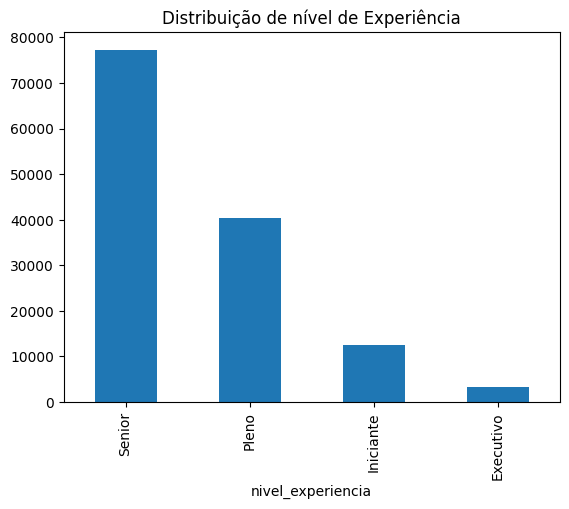

In [ ]:
df_limpo["nivel_experiencia"].value_counts().plot(kind="bar", title="Distribuição de nível de Experiência")

In [ ]:
import seaborn as sns

<Axes: xlabel='nivel_experiencia', ylabel='moeda_usd'>

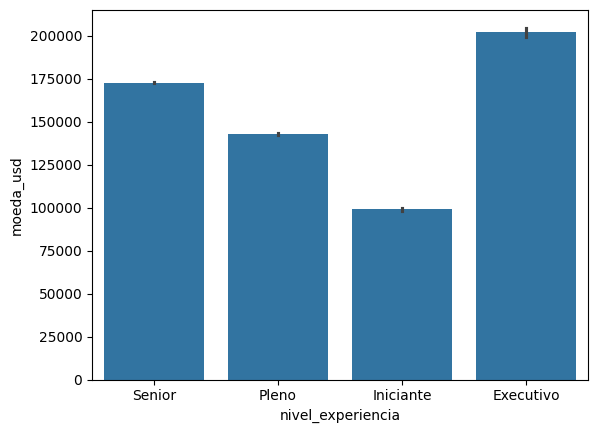

In [ ]:
sns.barplot(data = df_limpo, x = 'nivel_experiencia', y = 'moeda_usd')

In [ ]:
import matplotlib.pyplot as plt

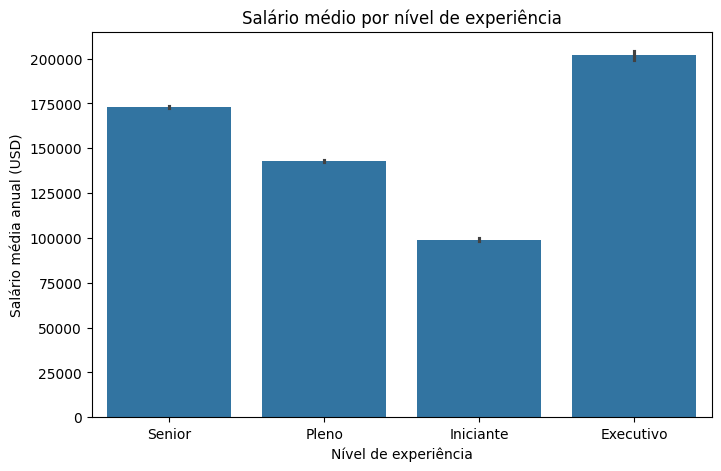

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(data = df_limpo, x = 'nivel_experiencia', y = 'moeda_usd')
plt.title("Salário médio por nível de experiência")
plt.xlabel("Nível de experiência")
plt.ylabel("Salário média anual (USD)")
plt.show()

In [ ]:
df_limpo.groupby("nivel_experiencia")["moeda_usd"].mean().sort_values(ascending = False)
#vai agrupar(coluna que queremos agrupar)[coluna que vamos calcular a estatística(nesse caso, a média)]
#sort - ordenar valores

,moeda_usd
nivel_experiencia,
Executivo,202027.667813
Senior,172850.838301
Pleno,143044.845979
Iniciante,99034.963267


In [ ]:
ordem = df_limpo.groupby("nivel_experiencia")["moeda_usd"].mean().sort_values(ascending = True).index
#.index no final mostra a ordem das colunas

In [ ]:
ordem

Index(['Iniciante', 'Pleno', 'Senior', 'Executivo'], dtype='object', name='nivel_experiencia')

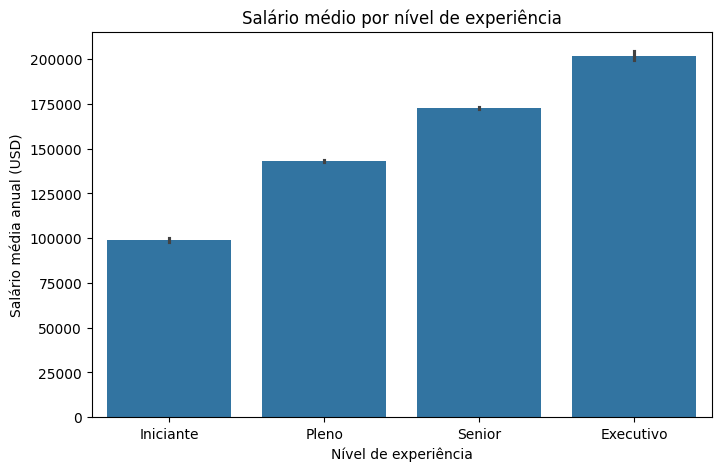

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(data = df_limpo, x = 'nivel_experiencia', y = 'moeda_usd', order = ordem)
plt.title("Salário médio por nível de experiência")
plt.xlabel("Nível de experiência")
plt.ylabel("Salário média anual (USD)")
plt.show()

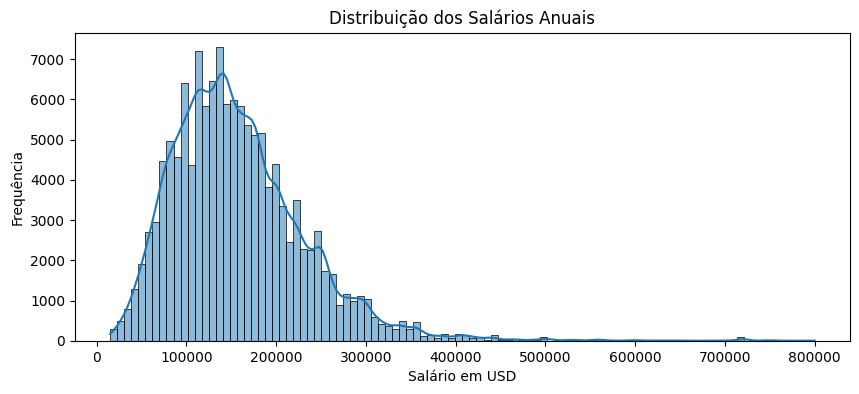

In [ ]:
plt.figure(figsize = (10,4))
sns.histplot(df_limpo['moeda_usd'], bins = 100, kde =True)
#bins = parâmetro, qual o intervalor entre as barras do histograma
#kde = linha de visualização do gráfico
plt.title("Distribuição dos Salários Anuais")
plt.xlabel("Salário em USD")
plt.ylabel("Frequência")
plt.show()

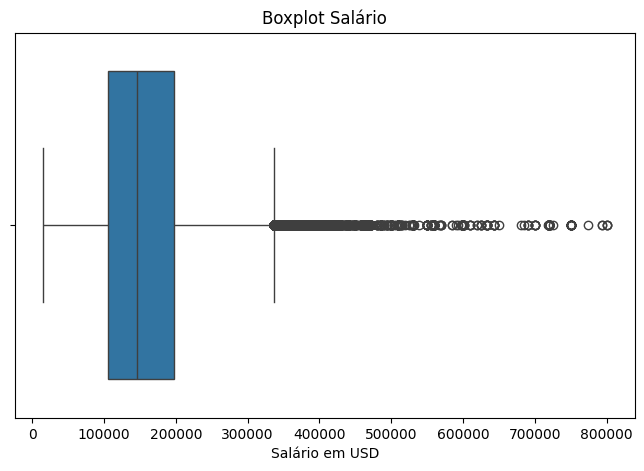

In [ ]:
plt.figure(figsize =(8,5))
sns.boxplot(x=df_limpo['moeda_usd'])
plt.title("Boxplot Salário")
plt.xlabel("Salário em USD")
plt.show()

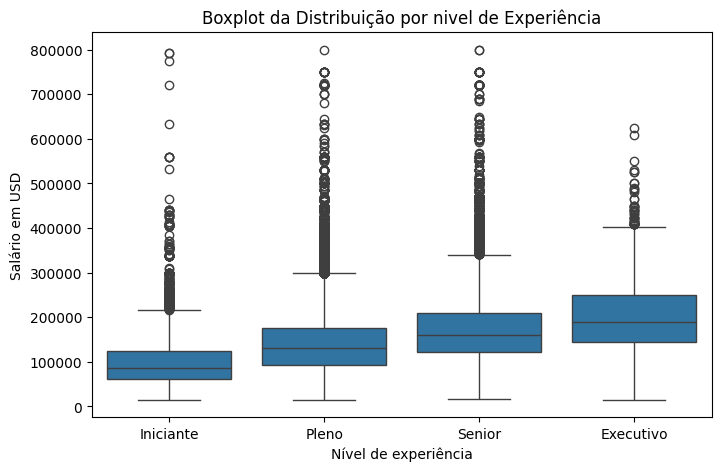

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x = 'nivel_experiencia', y = 'moeda_usd', data=df_limpo, order=ordem)
plt.title("Boxplot da Distribuição por nivel de Experiência")
plt.xlabel("Nível de experiência")
plt.ylabel("Salário em USD")
plt.show()

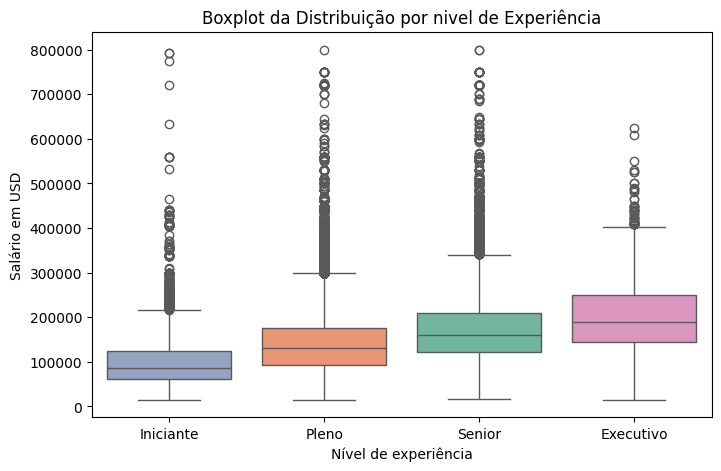

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x = 'nivel_experiencia', y = 'moeda_usd', data=df_limpo, order=ordem, palette='Set2', hue ='nivel_experiencia')
plt.title("Boxplot da Distribuição por nivel de Experiência")
plt.xlabel("Nível de experiência")
plt.ylabel("Salário em USD")
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
salario_medio_por_nivel = df_limpo.groupby("nivel_experiencia")["moeda_usd"].mean().reset_index()
fig = px.bar(salario_medio_por_nivel, x='nivel_experiencia', y='moeda_usd',
             title='Média Salarial por Nível de Experiência',
             labels={'nivel_experiencia': 'Nível de Experiência', 'moeda_usd': 'Média Salarial (USD)'},
             category_orders={"nivel_experiencia": ordem})
fig.show()

In [ ]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5, #buraco da rosquinha
             )
fig.update_traces(textinfo='percent+label')
fig.show()

# Aula 4 -

In [ ]:
df_limpo.head()

,ano_trabalho,nivel_experiencia,contrato,cargo,salario,moeda,moeda_usd,residencia_empregado,remoto,localizacao_empresa,tamanho_empresa
0,2025,Senior,Full Time,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Senior,Full Time,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Full Time,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Full Time,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Iniciante,Full Time,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [ ]:
salario_medio_pais = df_limpo.groupby('localizacao_empresa')['moeda_usd'].mean().reset_index()
salario_medio_pais = salario_medio_pais.sort_values(by='moeda_usd', ascending = True)

fig = px.bar(salario_medio_pais, x = 'localizacao_empresa', y = 'moeda_usd',
             title='Média Salarial por País',
             labels={'salario_medio_pais': 'Países', 'moeda_usd': 'Média Salarial (USD)'},
             )
fig.show()